# 📝 Evaluation Notebook

In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
os.chdir("../")

In [3]:
from lib.config import Config
from lib.paths import Paths
from lib.utils.utils import seed_everything

In [4]:
seed_everything()

## Load Prediction Data

In [5]:
df = pd.read_csv("output/microsoft/deberta-v3-base/oof_df.csv")
df.shape

(17307, 7)

## Distribution of Scores

In [6]:
fig = go.Figure(
    data=[
        go.Bar(
            x=df.score.unique(),
            y=df.score.value_counts(),
            name="Ground Truth",
        ),
        go.Bar(
            x=df.pred_score.unique(),
            y=df.pred_score.value_counts(),
            name="Prediction",
        ),
    ]
)

fig.update_layout(
    title="Bar plot<br><sup>Ground Truth vs Prediction Score</sup>",
    title_x=0.5,
)

# Show the figure
fig.show()

## Confusion Matrix

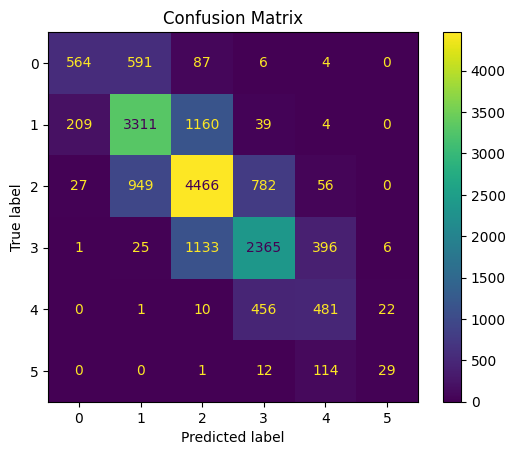

In [7]:
cm = confusion_matrix(df["score"], df["pred_score"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(Config.NUM_CLASSES)))

# Plot the confusion matrix
disp.plot(cmap='viridis', values_format='d')
plt.title("Confusion Matrix")
plt.show()

## Various Metrics

In [8]:
def init_list():
    return [0 for _ in range(Config.NUM_CLASSES)]

score_dict = {
    "TP": init_list(),
    "FP": init_list(),
    "TN": init_list(),
    "FN": init_list(),
    "Accuracy": init_list(),
    "Error Rate": init_list(),
    "Precision": init_list(),
    "Recall": init_list(),
    "F1 Score": init_list(),
    "Sensitivity": init_list(),
    "Specificity": init_list(),
}

for score in range(Config.NUM_CLASSES):
    tp = df.loc[(df.score == score) & (df.score == df.pred_score), "score"].count()
    fp = df.loc[(df.score != score) & (df.pred_score == score), "score"].count()
    tn = df.loc[(df.score != score) & (df.pred_score != score), "score"].count()
    fn = df.loc[(df.score == score) & (df.pred_score != score), "score"].count()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    error_rate = 1 - accuracy
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = (2 * precision * recall) / (precision + recall)
    sensitivity = recall
    specificity = tn / (tn + fp)

    score_dict["TP"][score] = tp
    score_dict["FP"][score] = fp
    score_dict["TN"][score] = tn
    score_dict["FN"][score] = fn
    score_dict["Accuracy"][score] = accuracy
    score_dict["Error Rate"][score] = error_rate
    score_dict["Precision"][score] = precision
    score_dict["Recall"][score] = recall
    score_dict["F1 Score"][score] = f1
    score_dict["Sensitivity"][score] = sensitivity
    score_dict["Specificity"][score] = specificity

In [9]:
score_df = pd.DataFrame.from_dict(score_dict)
score_df

,TP,FP,TN,FN,Accuracy,Error Rate,Precision,Recall,F1 Score,Sensitivity,Specificity
0,564,237,15818,688,0.946553,0.053447,0.704120,0.450479,0.549440,0.450479,0.985238
1,3311,1566,11018,1412,0.827931,0.172069,0.678901,0.701037,0.689792,0.701037,0.875556
2,4466,2391,8636,1814,0.757035,0.242965,0.651305,0.711146,0.679912,0.711146,0.783169
3,2365,1295,12086,1561,0.834980,0.165020,0.646175,0.602394,0.623517,0.602394,0.903221
4,481,574,15763,489,0.938580,0.061420,0.455924,0.495876,0.475062,0.495876,0.964865
5,29,28,17123,127,0.991044,0.008956,0.508772,0.185897,0.272300,0.185897,0.998367


### Precision, Recall, F1 Score

In [10]:
px.line(score_df, y=["Precision", "Recall", "F1 Score"])

### Sensitivity and Specificity

In [11]:
px.line(score_df, y=["Sensitivity", "Specificity"])